# Sprint Reports Analysis

Este notebook analiza el progreso del sprint basado en los datos de las Historias de Usuario (HU) y sus subtareas.

## Parámetros de entrada:
- `week`: Número de semana (ej: 1, 2, 3...)


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta
import os
import warnings
warnings.filterwarnings('ignore')

# Configuración de estilo para los gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Parámetros de entrada (modificar según sea necesario)
week = 3
sprint_number = 2

print(f"Análisis de la semana {week} y el sprint {sprint_number}")


Análisis de la semana 3 y el sprint 2


In [30]:
# Función para cargar los datos de la semana específica
def load_week_data(week_number):
    """
    Carga los datos de la semana especificada
    """
    file_path = f'week_{week_number}_reports_data.csv'
    
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"No se encontró el archivo {file_path}")
    
    df = pd.read_csv(file_path)
    print(f"Archivo cargado: {file_path}")
    print(f"Registros encontrados: {len(df)}")
    
    return df

# Cargar datos de la semana
week_data = load_week_data(week)

# Mostrar información del DataFrame
print("\nInformación del DataFrame:")
week_data.info()

print("\nPrimeras 5 filas:")
week_data.head()


Archivo cargado: week_3_reports_data.csv
Registros encontrados: 64

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   HU               64 non-null     object
 1   sub_task         64 non-null     object
 2   status           64 non-null     object
 3   completion_date  35 non-null     object
 4   assignee         60 non-null     object
dtypes: object(5)
memory usage: 2.6+ KB

Primeras 5 filas:


,HU,sub_task,status,completion_date,assignee
0,HU02,SCRUM-123 - Realizar pruebas unitarias backend,Done,2025-10-15,Johann Sebastian Paez Campos
1,HU02,SCRUM-124 - Realizar pruebas unitarias frontend,Done,2025-10-19,Miguel Fernando Padilla Espino
2,HU02,SCRUM-122 - Realizar pruebas manuales,Done,2025-10-12,Julian Oliveros forero
3,HU02,SCRUM-121 - Integrar backend y frontend,Done,2025-10-15,js.cervantes
4,HU02,SCRUM-120 - Crear frontend,Done,2025-10-12,js.cervantes


In [31]:
# Cargar datos de story points y business value
def load_story_points_data():
    """
    Carga los datos de story points y business value points
    """
    file_path = 'HU_business_value_points.csv'
    
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"No se encontró el archivo {file_path}")
    
    df = pd.read_csv(file_path)
    print(f"Archivo de story points cargado: {file_path}")
    print(f"HUs encontradas: {len(df)}")
    
    return df

# Cargar datos de story points
story_points_data = load_story_points_data()

print("\nDatos de story points:")
story_points_data


Archivo de story points cargado: HU_business_value_points.csv
HUs encontradas: 14

Datos de story points:


,HU,story_points,business_value_points,sprint,sprint_start_date,sprint_end_date
0,HU01,5,12,Sprint 3,2025-11-03,2025-11-23
1,HU02,5,8,Sprint 1,2025-10-06,2025-10-19
2,HU03,5,7,Sprint 1,2025-10-06,2025-10-19
3,HU04,3,5,Sprint 2,2025-10-20,2025-11-02
4,HU05,3,10,Sprint 1,2025-10-06,2025-10-19
5,HU06,3,5,Sprint 2,2025-10-20,2025-11-02
6,HU07,3,4,Sprint 2,2025-10-20,2025-11-02
7,HU08,5,8,Sprint 2,2025-10-20,2025-11-02
8,HU09,5,11,Sprint 2,2025-10-20,2025-11-02
9,HU10,5,6,Sprint 3,2025-11-03,2025-11-23


In [32]:
# Función para calcular story points y business value por subtarea
def calculate_story_points_per_subtask(sprint_data, story_points_data):
    """
    Calcula los story points y business value por subtarea y los añade al DataFrame original
    """
    # Crear una copia del DataFrame original para no modificar el original
    enhanced_data = sprint_data.copy()
    
    # Merge con story points data para obtener información de sprint y puntos
    enhanced_data = pd.merge(enhanced_data, story_points_data[['HU', 'sprint', 'sprint_start_date', 'sprint_end_date', 'story_points', 'business_value_points']], on='HU', how='left')
    
    # Contar subtareas por HU para calcular puntos por subtarea
    subtasks_per_hu = sprint_data.groupby('HU').size().reset_index(name='total_subtasks')
    
    # Merge con el conteo de subtareas
    enhanced_data = pd.merge(enhanced_data, subtasks_per_hu, on='HU', how='left')
    
    # Calcular story points y business value por subtarea
    enhanced_data['story_points_per_subtask'] = enhanced_data['story_points'] / enhanced_data['total_subtasks']
    enhanced_data['business_value_per_subtask'] = enhanced_data['business_value_points'] / enhanced_data['total_subtasks']
    
    # Eliminar columnas temporales que no necesitamos
    enhanced_data = enhanced_data.drop(['total_subtasks', 'story_points', 'business_value_points'], axis=1)
    
    return enhanced_data

# Calcular story points y business value por subtarea del sprint
enhanced_week_data = calculate_story_points_per_subtask(week_data, story_points_data)

enhanced_week_data.info()

print("\nDatos de la semana con información de story points y business value:")
enhanced_week_data.head(50)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   HU                          64 non-null     object 
 1   sub_task                    64 non-null     object 
 2   status                      64 non-null     object 
 3   completion_date             35 non-null     object 
 4   assignee                    60 non-null     object 
 5   sprint                      64 non-null     object 
 6   sprint_start_date           64 non-null     object 
 7   sprint_end_date             64 non-null     object 
 8   story_points_per_subtask    64 non-null     float64
 9   business_value_per_subtask  64 non-null     float64
dtypes: float64(2), object(8)
memory usage: 5.1+ KB

Datos de la semana con información de story points y business value:


,HU,sub_task,status,completion_date,assignee,sprint,sprint_start_date,sprint_end_date,story_points_per_subtask,business_value_per_subtask
0,HU02,SCRUM-123 - Realizar pruebas unitarias backend,Done,2025-10-15,Johann Sebastian Paez Campos,Sprint 1,2025-10-06,2025-10-19,0.833333,1.333333
1,HU02,SCRUM-124 - Realizar pruebas unitarias frontend,Done,2025-10-19,Miguel Fernando Padilla Espino,Sprint 1,2025-10-06,2025-10-19,0.833333,1.333333
2,HU02,SCRUM-122 - Realizar pruebas manuales,Done,2025-10-12,Julian Oliveros forero,Sprint 1,2025-10-06,2025-10-19,0.833333,1.333333
3,HU02,SCRUM-121 - Integrar backend y frontend,Done,2025-10-15,js.cervantes,Sprint 1,2025-10-06,2025-10-19,0.833333,1.333333
4,HU02,SCRUM-120 - Crear frontend,Done,2025-10-12,js.cervantes,Sprint 1,2025-10-06,2025-10-19,0.833333,1.333333
5,HU02,SCRUM-119 - Crear backend,Done,2025-10-10,Johann Sebastian Paez Campos,Sprint 1,2025-10-06,2025-10-19,0.833333,1.333333
6,HU05,SCRUM-125 - Crear backend,Done,2025-10-10,Miguel Fernando Padilla Espino,Sprint 1,2025-10-06,2025-10-19,0.500000,1.666667
7,HU05,SCRUM-126 - Crear frontend,Done,2025-10-10,Johann Sebastian Paez Campos,Sprint 1,2025-10-06,2025-10-19,0.500000,1.666667
8,HU05,SCRUM-127 - Integrar backend y frontend,Done,2025-10-12,Johann Sebastian Paez Campos,Sprint 1,2025-10-06,2025-10-19,0.500000,1.666667
9,HU05,SCRUM-128 - Realizar pruebas manuales,Done,2025-10-12,js.cervantes,Sprint 1,2025-10-06,2025-10-19,0.500000,1.666667


In [33]:
# Mostrar datos filtrados del Sprint 1
sprint_1_data = enhanced_week_data[enhanced_week_data['sprint'] == f'Sprint {sprint_number}']

print(f"Datos del Sprint {sprint_number}:")
print(f"Total de registros: {len(sprint_1_data)}")
print(f"Registros únicos por HU: {sprint_1_data['HU'].nunique()}")

print("\nDatos completos del Sprint:")
sprint_1_data


Datos del Sprint 2:
Total de registros: 30
Registros únicos por HU: 5

Datos completos del Sprint:


,HU,sub_task,status,completion_date,assignee,sprint,sprint_start_date,sprint_end_date,story_points_per_subtask,business_value_per_subtask
24,HU04,SCRUM-183 - Crear backend,Done,2025-10-21,Johann Sebastian Paez Campos,Sprint 2,2025-10-20,2025-11-02,0.500000,0.833333
25,HU04,SCRUM-184 - Crear componente de registro de pe...,In Progress,NaN,js.cervantes,Sprint 2,2025-10-20,2025-11-02,0.500000,0.833333
26,HU04,SCRUM-185 - Crear vista de registro de pedidos...,In Progress,NaN,Julian Oliveros forero,Sprint 2,2025-10-20,2025-11-02,0.500000,0.833333
27,HU04,SCRUM-186 - Realizar pruebas unitarias backend...,To Do,NaN,Miguel Fernando Padilla Espino,Sprint 2,2025-10-20,2025-11-02,0.500000,0.833333
28,HU04,SCRUM-187 - Realizar pruebas manuales de pedidos,To Do,NaN,Johann Sebastian Paez Campos,Sprint 2,2025-10-20,2025-11-02,0.500000,0.833333
29,HU04,SCRUM-188 - Realizar Pruebas End-to-end Front ...,To Do,NaN,js.cervantes,Sprint 2,2025-10-20,2025-11-02,0.500000,0.833333
30,HU06,SCRUM-160 - Crear Backend,In Progress,NaN,Miguel Fernando Padilla Espino,Sprint 2,2025-10-20,2025-11-02,0.500000,0.833333
31,HU06,SCRUM-161 - Realizar Pruebas Backend,In Progress,NaN,js.cervantes,Sprint 2,2025-10-20,2025-11-02,0.500000,0.833333
32,HU06,SCRUM-162 - Crear componente en APP,Done,2025-10-21,Johann Sebastian Paez Campos,Sprint 2,2025-10-20,2025-11-02,0.500000,0.833333
33,HU06,SCRUM-163 - Crear vista en APP,Done,2025-10-24,Johann Sebastian Paez Campos,Sprint 2,2025-10-20,2025-11-02,0.500000,0.833333


Sprint 2: 2025-10-20 a 2025-11-02
Fecha actual: 2025-10-26
Línea real se mostrará hasta: 2025-10-26
Total de story points en el sprint: 19.0
Gráfico guardado en: week_3/sprint burn down chart.png


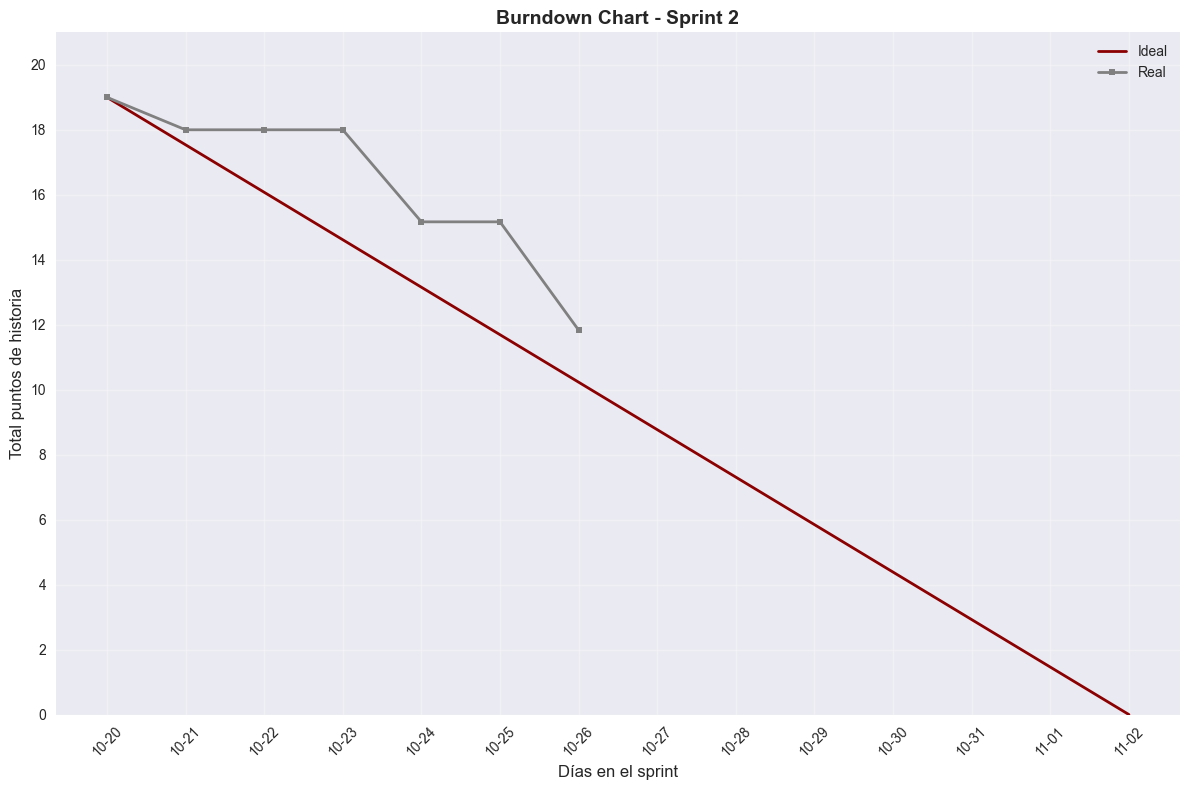


Estadísticas del Sprint 2:
Días del sprint: 14
Días transcurridos: 7
Story points totales: 19.0
Story points completados: 7.166666666666668
Story points restantes: 11.833333333333332
Velocidad promedio ideal: 1.46 puntos/día

Tareas completadas (11):
  SCRUM-183 - Crear backend - 2025-10-21 - 0.5 pts
  SCRUM-162 - Crear componente en APP - 2025-10-21 - 0.5 pts
  SCRUM-163 - Crear vista en APP - 2025-10-24 - 0.5 pts
  SCRUM-165 - Realizar Pruebas End-to-end - 2025-10-24 - 0.5 pts
  SCRUM-159 - Crear backend - 2025-10-26 - 0.8 pts
  SCRUM-166 - Crear componente de registro de pedidos en APP - 2025-10-26 - 0.8 pts
  SCRUM-167 - Crear vista de registro de pedidos en APP - 2025-10-26 - 0.8 pts
  SCRUM-168 - Realizar pruebas unitarias backend para pedidos - 2025-10-26 - 0.8 pts
  SCRUM-153 - Crear backend - 2025-10-24 - 0.8 pts
  SCRUM-170 - Crear Backend - 2025-10-24 - 0.5 pts
  SCRUM-173 - Crear vista en APP - 2025-10-24 - 0.5 pts


In [34]:
# Función para crear burndown chart
def create_burndown_chart(enhanced_data, sprint_number, week_number):
    """
    Crea un burndown chart para el sprint especificado y lo guarda en la carpeta week#
    """
    # Filtrar datos del sprint específico
    sprint_data = enhanced_data[enhanced_data['sprint'] == f'Sprint {sprint_number}'].copy()
    
    if sprint_data.empty:
        print(f"No se encontraron datos para el Sprint {sprint_number}")
        return None
    
    # Obtener fechas del sprint
    sprint_start = pd.to_datetime(sprint_data['sprint_start_date'].iloc[0])
    sprint_end = pd.to_datetime(sprint_data['sprint_end_date'].iloc[0])
    
    print(f"Sprint {sprint_number}: {sprint_start.strftime('%Y-%m-%d')} a {sprint_end.strftime('%Y-%m-%d')}")
    
    # Obtener fecha actual
    today = pd.Timestamp.now().normalize()
    
    # Determinar hasta qué fecha mostrar la línea real
    if today < sprint_start:
        # Si aún no ha empezado el sprint, mostrar solo hasta el inicio
        real_end_date = sprint_start
    elif today > sprint_end:
        # Si el sprint ya terminó, mostrar hasta el final
        real_end_date = sprint_end
    else:
        # Si estamos en el sprint, mostrar hasta hoy
        real_end_date = today
    
    print(f"Fecha actual: {today.strftime('%Y-%m-%d')}")
    print(f"Línea real se mostrará hasta: {real_end_date.strftime('%Y-%m-%d')}")
    
    # Crear rango de días del sprint completo (para la línea ideal)
    sprint_days = pd.date_range(start=sprint_start, end=sprint_end, freq='D')
    
    # Crear rango de días para la línea real (hasta la fecha actual)
    real_days = pd.date_range(start=sprint_start, end=real_end_date, freq='D')
    
    # Calcular total de story points al inicio del sprint
    total_story_points = sprint_data['story_points_per_subtask'].sum()
    
    print(f"Total de story points en el sprint: {total_story_points}")
    
    # Calcular progreso real día a día (solo hasta la fecha actual)
    real_progress = []
    
    for day in real_days:
        # Contar story points completados hasta este día (inclusive)
        completed_today = sprint_data[
            (pd.to_datetime(sprint_data['completion_date'], errors='coerce') <= day) & 
            (sprint_data['status'] == 'Done')
        ]['story_points_per_subtask'].sum()
        
        # Calcular puntos restantes
        remaining_points = total_story_points - completed_today
        real_progress.append(remaining_points)
    
    # Calcular progreso ideal (línea diagonal completa)
    ideal_progress = []
    daily_burn_rate = total_story_points / (len(sprint_days) - 1)
    
    for i, day in enumerate(sprint_days):
        ideal_remaining = total_story_points - (daily_burn_rate * i)
        ideal_progress.append(max(0, ideal_remaining))
    
    # Crear el gráfico
    plt.figure(figsize=(12, 8))
    
    # Convertir fechas a números para el eje X
    day_numbers = range(len(sprint_days))
    real_day_numbers = range(len(real_days))
    
    # Graficar líneas
    plt.plot(day_numbers, ideal_progress, 'r-', linewidth=2, label='Ideal', color='darkred')
    plt.plot(real_day_numbers, real_progress, 's-', linewidth=2, label='Real', color='gray', markersize=4)
    
    # Configurar el gráfico
    plt.xlabel('Días en el sprint', fontsize=12)
    plt.ylabel('Total puntos de historia', fontsize=12)
    plt.title(f'Burndown Chart - Sprint {sprint_number}', fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Configurar eje X con fechas
    plt.xticks(day_numbers[::max(1, len(sprint_days)//10)], 
               [sprint_days[i].strftime('%m-%d') for i in range(0, len(sprint_days), max(1, len(sprint_days)//10))],
               rotation=45)
    
    # Configurar eje Y con números enteros
    max_points = int(np.ceil(total_story_points * 1.1))
    plt.ylim(0, max_points)
    plt.yticks(range(0, max_points + 1, max(1, max_points // 10)))
    
    plt.tight_layout()
    
    # Crear la carpeta week# si no existe
    week_folder = f'week_{week_number}'
    if not os.path.exists(week_folder):
        os.makedirs(week_folder)
        print(f"Carpeta creada: {week_folder}")
    
    # Guardar el gráfico en la carpeta week# con el nombre "sprint burn down chart"
    save_path = os.path.join(week_folder, 'sprint burn down chart.png')
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"Gráfico guardado en: {save_path}")
    
    plt.show()
    
    # Mostrar estadísticas del sprint
    print(f"\nEstadísticas del Sprint {sprint_number}:")
    print(f"Días del sprint: {len(sprint_days)}")
    print(f"Días transcurridos: {len(real_days)}")
    print(f"Story points totales: {total_story_points}")
    print(f"Story points completados: {total_story_points - real_progress[-1]}")
    print(f"Story points restantes: {real_progress[-1]}")
    print(f"Velocidad promedio ideal: {daily_burn_rate:.2f} puntos/día")
    
    # Mostrar detalles de las tareas completadas
    completed_tasks = sprint_data[
        (sprint_data['status'] == 'Done') & 
        (pd.to_datetime(sprint_data['completion_date'], errors='coerce').notna())
    ]
    
    if not completed_tasks.empty:
        print(f"\nTareas completadas ({len(completed_tasks)}):")
        for _, task in completed_tasks.iterrows():
            completion_date = pd.to_datetime(task['completion_date'], errors='coerce')
            print(f"  {task['sub_task']} - {completion_date.strftime('%Y-%m-%d')} - {task['story_points_per_subtask']:.1f} pts")
    
    return {
        'sprint_days': sprint_days,
        'real_days': real_days,
        'ideal_progress': ideal_progress,
        'real_progress': real_progress,
        'total_story_points': total_story_points,
        'save_path': save_path
    }

# Crear el burndown chart para el sprint actual
burndown_data = create_burndown_chart(enhanced_week_data, sprint_number, week)


Creando velocity chart  para 7 semanas...
Mapeo de semanas a sprints:
  Semana 1 → Sprint 1
  Semana 2 → Sprint 1
  Semana 3 → Sprint 2
  Semana 4 → Sprint 2
  Semana 5 → Sprint 3
  Semana 6 → Sprint 3
  Semana 7 → Sprint 3
  Semana 1 (Sprint 1): Planeados=9.0, Reales=9.5
  Semana 2 (Sprint 1): Planeados=9.0, Reales=8.5
  Semana 3 (Sprint 2): Planeados=9.5, Reales=7.2
  Semana 4: Semana futura - sin información
  Semana 5: Semana futura - sin información
  Semana 6: Semana futura - sin información
  Semana 7: Semana futura - sin información
Velocity chart guardado en: week_3/velocity chart.png


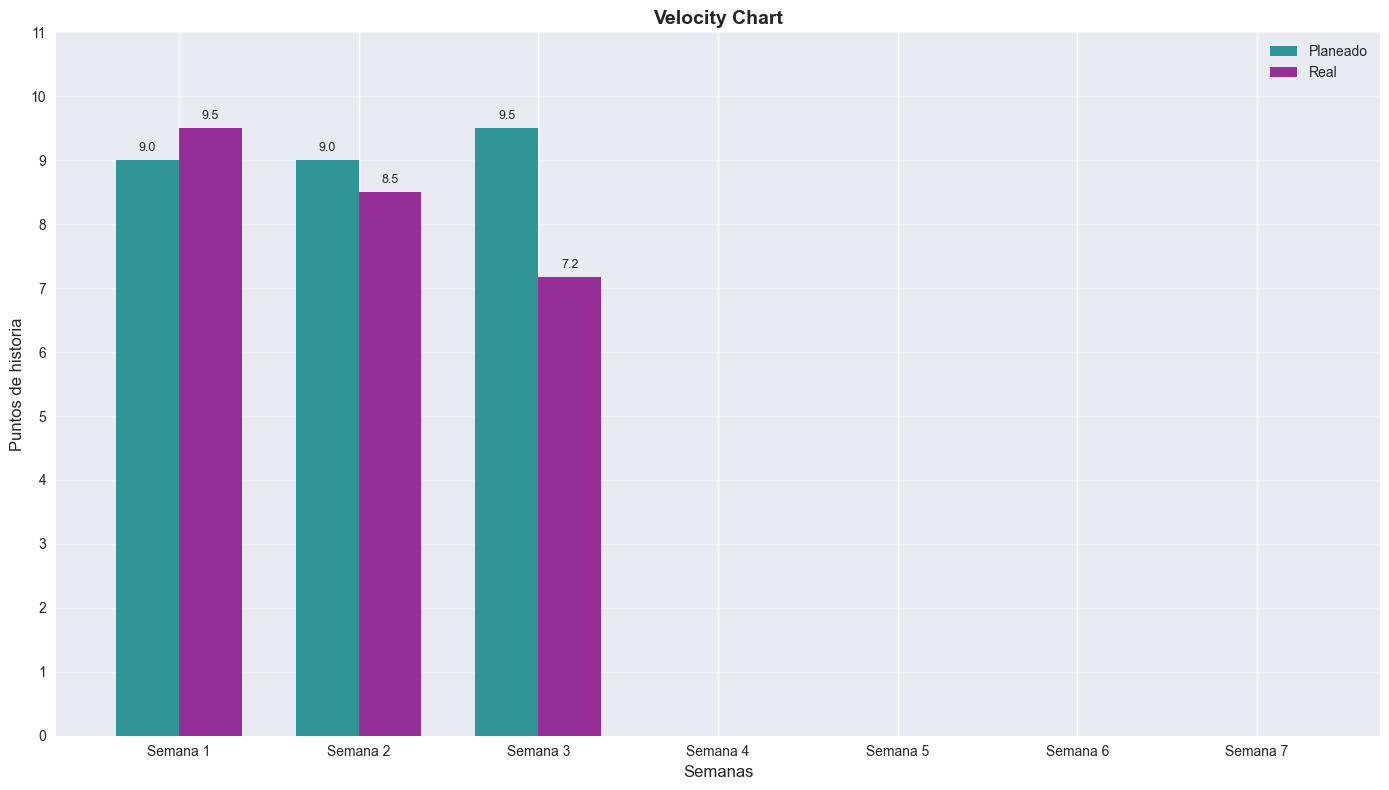

Resumen del Velocity Chart:
Semanas mostradas: 7
Semanas con datos: 3
Semanas futuras: 4
Total story points planeados: 27.5
Total story points reales: 25.2
Promedio planeado por semana (con datos): 9.2
Promedio real por semana (con datos): 8.4


In [35]:
# Funciones auxiliares para create_velocity_chart - CORREGIDAS
def get_sprint_mapping():
    """Retorna el mapeo correcto de semanas a sprints según las fechas reales"""
    return {
        1: 'Sprint 1',  # Semana 1 del Sprint 1
        2: 'Sprint 1',  # Semana 2 del Sprint 1
        3: 'Sprint 2',  # Semana 1 del Sprint 2
        4: 'Sprint 2',  # Semana 2 del Sprint 2
        5: 'Sprint 3',  # Semana 1 del Sprint 3
        6: 'Sprint 3',  # Semana 2 del Sprint 3
        7: 'Sprint 3'   # Semana 3 del Sprint 3
    }

def calculate_week_story_points_corrected(week_data, story_points_data, current_sprint, week_num):
    """Calcula los story points planeados y reales para una semana específica dentro de un sprint"""
    sprint_hus = story_points_data[story_points_data['sprint'] == current_sprint]['HU'].tolist()
    sprint_week_data = week_data[week_data['HU'].isin(sprint_hus)]
    
    if sprint_week_data.empty:
        return 0, 0
    
    # Merge con story points data
    enhanced_week_data = pd.merge(sprint_week_data, story_points_data[['HU', 'sprint', 'sprint_start_date', 'sprint_end_date', 'story_points', 'business_value_points']], on='HU', how='left')
    
    # Contar subtareas por HU
    subtasks_per_hu = sprint_week_data.groupby('HU').size().reset_index(name='total_subtasks')
    enhanced_week_data = pd.merge(enhanced_week_data, subtasks_per_hu, on='HU', how='left')
    
    # Calcular story points por subtarea
    enhanced_week_data['story_points_per_subtask'] = enhanced_week_data['story_points'] / enhanced_week_data['total_subtasks']
    
    # Para puntos planeados: usar el total del sprint dividido por el número de semanas del sprint
    sprint_total_points = story_points_data[story_points_data['sprint'] == current_sprint]['story_points'].sum()
    
    # Determinar cuántas semanas dura cada sprint
    sprint_duration = {
        'Sprint 1': 2,  # 2 semanas
        'Sprint 2': 2,  # 2 semanas  
        'Sprint 3': 3   # 3 semanas
    }
    
    weeks_in_sprint = sprint_duration.get(current_sprint, 2)
    planned_points_per_week = sprint_total_points / weeks_in_sprint
    
    # Para puntos reales: contar solo las tareas completadas en esta semana específica
    # Filtrar por fecha de completado si está disponible
    if 'completion_date' in enhanced_week_data.columns:
        # Convertir fechas de completado
        enhanced_week_data['completion_date_parsed'] = pd.to_datetime(enhanced_week_data['completion_date'], errors='coerce')
        
        # Calcular el rango de fechas para esta semana específica
        sprint_start = pd.to_datetime(enhanced_week_data['sprint_start_date'].iloc[0])
        sprint_end = pd.to_datetime(enhanced_week_data['sprint_end_date'].iloc[0])
        
        # Determinar qué semana del sprint es esta
        sprint_week_mapping = {
            'Sprint 1': {1: 0, 2: 1},  # Semana 1 = día 0-6, Semana 2 = día 7-13
            'Sprint 2': {3: 0, 4: 1},  # Semana 3 = día 0-6, Semana 4 = día 7-13
            'Sprint 3': {5: 0, 6: 1, 7: 2}  # Semana 5 = día 0-6, Semana 6 = día 7-13, Semana 7 = día 14-20
        }
        
        week_in_sprint = sprint_week_mapping.get(current_sprint, {}).get(week_num, 0)
        
        # Calcular fechas de inicio y fin de esta semana específica
        days_per_week = 7
        week_start = sprint_start + timedelta(days=week_in_sprint * days_per_week)
        week_end = week_start + timedelta(days=days_per_week - 1)
        
        # Filtrar tareas completadas en esta semana específica
        completed_this_week = enhanced_week_data[
            (enhanced_week_data['status'] == 'Done') &
            (enhanced_week_data['completion_date_parsed'] >= week_start) &
            (enhanced_week_data['completion_date_parsed'] <= week_end)
        ]
        
        real_points = completed_this_week['story_points_per_subtask'].sum()
    else:
        # Si no hay fechas de completado, usar el método anterior
        real_points = enhanced_week_data[enhanced_week_data['status'] == 'Done']['story_points_per_subtask'].sum()
    
    return planned_points_per_week, real_points

def process_week_data_corrected(week_num, current_week, story_points_data):
    """Procesa los datos de una semana específica usando el mapeo correcto"""
    week_name = f"Semana {week_num}"
    planned_points = 0
    real_points = 0
    
    if week_num <= current_week:
        try:
            week_file = f'week_{week_num}_reports_data.csv'
            if os.path.exists(week_file):
                week_data = pd.read_csv(week_file)
                sprint_mapping = get_sprint_mapping()
                current_sprint = sprint_mapping.get(week_num, 'Sprint 3')
                
                planned_points, real_points = calculate_week_story_points_corrected(week_data, story_points_data, current_sprint, week_num)
                print(f"  {week_name} ({current_sprint}): Planeados={planned_points:.1f}, Reales={real_points:.1f}")
            else:
                print(f"  {week_name}: Archivo no encontrado")
        except Exception as e:
            print(f"  {week_name}: Error al procesar - {str(e)}")
    else:
        print(f"  {week_name}: Semana futura - sin información")
    
    return planned_points, real_points

def create_velocity_plot(weeks, planned_points, real_points):
    """Crea el gráfico de barras del velocity chart"""
    plt.figure(figsize=(14, 8))
    
    x = np.arange(len(weeks))
    width = 0.35
    
    bars_planned = plt.bar(x - width/2, planned_points, width, label='Planeado', color='teal', alpha=0.8)
    bars_real = plt.bar(x + width/2, real_points, width, label='Real', color='purple', alpha=0.8)
    
    plt.xlabel('Semanas', fontsize=12)
    plt.ylabel('Puntos de historia', fontsize=12)
    plt.title('Velocity Chart', fontsize=14, fontweight='bold')
    plt.xticks(x, weeks)
    
    # Configurar eje Y
    max_points = max(max(planned_points), max(real_points)) if planned_points or real_points else 10
    max_points = int(np.ceil(max_points * 1.1))
    plt.ylim(0, max_points)
    plt.yticks(range(0, max_points + 1, max(1, max_points // 10)))
    
    # Añadir valores en las barras
    for bar in bars_planned:
        height = bar.get_height()
        if height > 0:
            plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                    f'{height:.1f}', ha='center', va='bottom', fontsize=9)
    
    for bar in bars_real:
        height = bar.get_height()
        if height > 0:
            plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                    f'{height:.1f}', ha='center', va='bottom', fontsize=9)
    
    plt.legend()
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    
    return bars_planned, bars_real

def save_velocity_chart(current_week):
    """Guarda el velocity chart en la carpeta correspondiente"""
    week_folder = f'week_{current_week}'
    if not os.path.exists(week_folder):
        os.makedirs(week_folder)
        print(f"Carpeta creada: {week_folder}")
    
    save_path = os.path.join(week_folder, 'velocity chart.png')
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"Velocity chart guardado en: {save_path}")
    
    return save_path

def print_velocity_summary(max_weeks, current_week, planned_points, real_points):
    """Imprime el resumen del velocity chart"""
    print("Resumen del Velocity Chart:")
    print(f"Semanas mostradas: {max_weeks}")
    print(f"Semanas con datos: {current_week}")
    print(f"Semanas futuras: {max_weeks - current_week}")
    print(f"Total story points planeados: {sum(planned_points):.1f}")
    print(f"Total story points reales: {sum(real_points):.1f}")
    
    if current_week > 0:
        avg_planned = sum(planned_points[:current_week]) / current_week
        avg_real = sum(real_points[:current_week]) / current_week
        print(f"Promedio planeado por semana (con datos): {avg_planned:.1f}")
        print(f"Promedio real por semana (con datos): {avg_real:.1f}")

# Función para crear velocity chart - CORREGIDA
def create_velocity_chart_corrected(current_week, story_points_data):
    """
    Crea un velocity chart que compara story points planeados vs reales por semana.
    Usa el mapeo correcto de semanas a sprints y calcula correctamente los puntos por semana.
    """
    max_weeks = 7
    weeks = []
    planned_points = []
    real_points = []
    
    print(f"Creando velocity chart  para {max_weeks} semanas...")
    print("Mapeo de semanas a sprints:")
    sprint_mapping = get_sprint_mapping()
    for week_num in range(1, max_weeks + 1):
        sprint = sprint_mapping.get(week_num, 'Sprint 3')
        print(f"  Semana {week_num} → {sprint}")
    
    # Procesar cada semana
    for week_num in range(1, max_weeks + 1):
        week_name = f"Semana {week_num}"
        weeks.append(week_name)
        
        planned_week_points, real_week_points = process_week_data_corrected(week_num, current_week, story_points_data)
        
        planned_points.append(planned_week_points)
        real_points.append(real_week_points)
    
    # Crear el gráfico
    create_velocity_plot(weeks, planned_points, real_points)
    
    # Guardar el gráfico
    save_path = save_velocity_chart(current_week)
    plt.show()
    
    # Mostrar resumen
    print_velocity_summary(max_weeks, current_week, planned_points, real_points)
    
    return {
        'weeks': weeks,
        'planned_points': planned_points,
        'real_points': real_points,
        'save_path': save_path
    }

# Crear el velocity chart 
velocity_data_corrected = create_velocity_chart_corrected(week, story_points_data)

Creando Business Value Chart  para 7 semanas...
Valor total de negocio disponible: 100
  Semana 1 - Sprint Sprint 1:
    HUs disponibles: ['HU02', 'HU03', 'HU05', 'HU011']
    HUs completadas: Ninguna
    Business value real: 0
  Semana 1: Real=0.0, Planeado=15.5, Acumulado Real=0.0
  Semana 2 - Sprint Sprint 1:
    HUs disponibles: ['HU02', 'HU03', 'HU05', 'HU011']
    HUs completadas: ['HU011', 'HU02', 'HU03', 'HU05']
    Business value real: 31
  Semana 2: Real=31.0, Planeado=15.5, Acumulado Real=31.0
  Semana 3 - Sprint Sprint 2:
    HUs disponibles: ['HU04', 'HU06', 'HU07', 'HU08', 'HU09']
    HUs completadas: Ninguna
    Business value real: 0
  Semana 3: Real=0.0, Planeado=16.5, Acumulado Real=31.0
  Semana 4: Real=0.0, Planeado=16.5, Acumulado Real=31.0
  Semana 5: Real=0.0, Planeado=12.0, Acumulado Real=31.0
  Semana 6: Real=0.0, Planeado=12.0, Acumulado Real=31.0
  Semana 7: Real=0.0, Planeado=12.0, Acumulado Real=31.0
Business Value Chart  guardado en: week_3/business value 

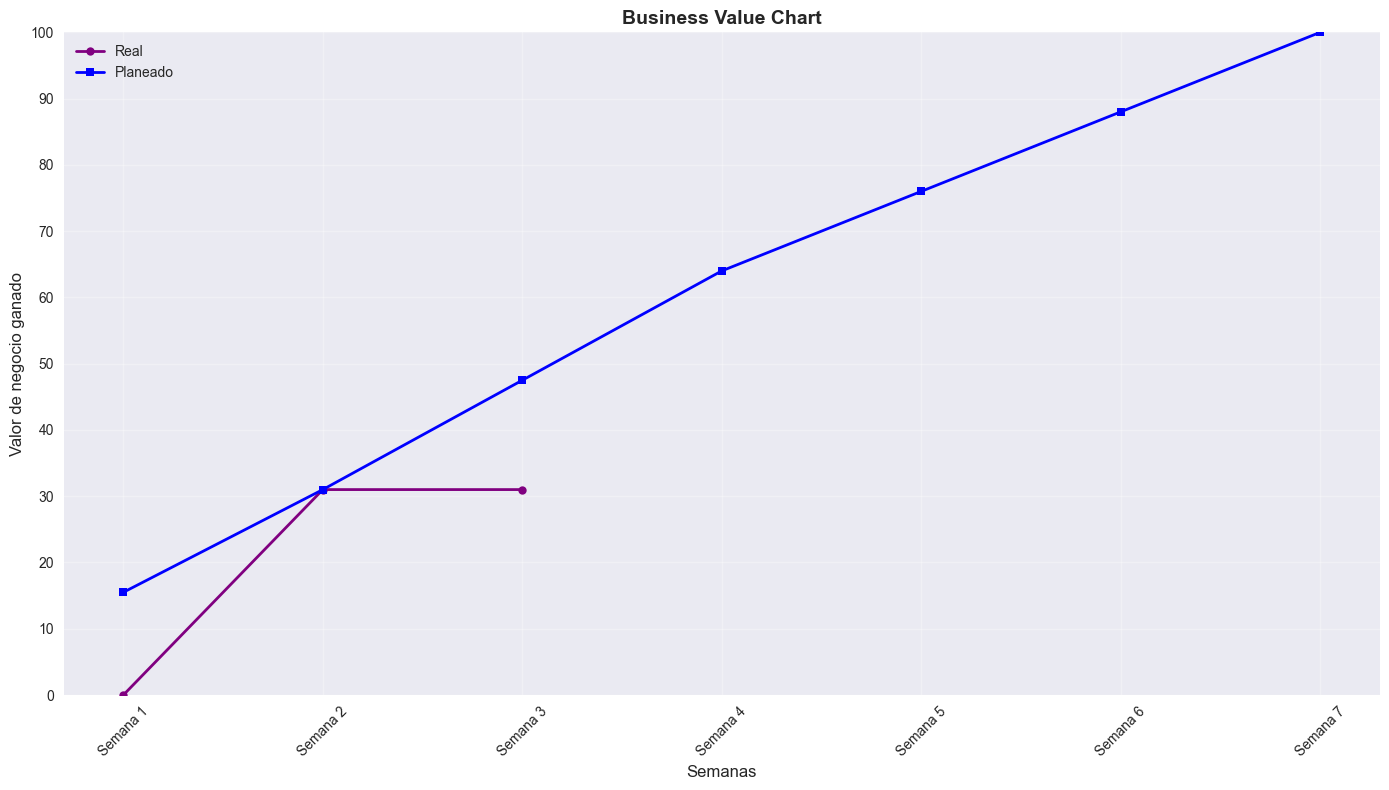


Estadísticas del Business Value Chart :
Valor total disponible: 100
Valor real acumulado: 31.0
Valor planeado acumulado: 100.0
Porcentaje completado (real): 31.0%


In [36]:
# Función CORREGIDA para calcular business value por semana
def calculate_week_business_value_corrected(week_num, current_week, story_points_data):
    """
    Calcula el valor de negocio real y planeado para una semana específica
    CORREGIDA: Mapeo correcto de semanas a sprints
    """
    real_value = 0
    planned_value = 0

    if week_num <= current_week:
        try:
            week_file = f'week_{week_num}_reports_data.csv'
            if os.path.exists(week_file):
                week_data = pd.read_csv(week_file)

                # Mapear semana a sprint - 
                sprint_mapping = {
                    1: 'Sprint 1',
                    2: 'Sprint 1',  # Semana 2 también es Sprint 1
                    3: 'Sprint 2',
                    4: 'Sprint 2',  # Semana 4 también es Sprint 2
                    5: 'Sprint 3',
                    6: 'Sprint 3',
                    7: 'Sprint 3'
                }
                current_sprint = sprint_mapping.get(week_num, 'Sprint 3')

                # Obtener HUs del sprint
                sprint_hus = story_points_data[story_points_data['sprint']
                                               == current_sprint]['HU'].tolist()
                sprint_week_data = week_data[week_data['HU'].isin(sprint_hus)]

                if not sprint_week_data.empty:
                    # Merge con story points data
                    enhanced_week_data = pd.merge(sprint_week_data, story_points_data[[
                                                  'HU', 'business_value_points']], on='HU', how='left')

                    # Para business value, usamos el valor completo de la HU cuando todas sus subtareas están completas
                    # Verificar qué HUs están completamente terminadas
                    hu_status = enhanced_week_data.groupby('HU').agg({
                        'status': lambda x: all(status == 'Done' for status in x),
                        'business_value_points': 'first'
                    }).reset_index()

                    # Sumar business value solo de HUs completamente terminadas
                    completed_hus = hu_status[hu_status['status'] == True]
                    real_value = completed_hus['business_value_points'].sum()

                    print(f"  Semana {week_num} - Sprint {current_sprint}:")
                    print(f"    HUs disponibles: {sprint_hus}")
                    print(
                        f"    HUs completadas: {completed_hus['HU'].tolist() if not completed_hus.empty else 'Ninguna'}")
                    print(f"    Business value real: {real_value}")

                    # Para el valor planeado, usar los valores reales de business value por sprint
                    sprint_business_value = story_points_data[story_points_data['sprint']
                                                              == current_sprint]['business_value_points'].sum()

                    # Distribuir el valor del sprint en las semanas correspondientes
                    if current_sprint == 'Sprint 1':
                        # Sprint 1: semanas 1-2 (distribuir 31 puntos)
                        planned_value = sprint_business_value / 2  # 31/2 = 15.5 por semana
                    elif current_sprint == 'Sprint 2':
                        # Sprint 2: semanas 3-4 (distribuir 34 puntos)
                        planned_value = sprint_business_value / 2  # 34/2 = 17 por semana
                    elif current_sprint == 'Sprint 3':
                        # Sprint 3: semanas 5-7 (distribuir 35 puntos en 3 semanas)
                        planned_value = sprint_business_value / 3  # 35/3 ≈ 11.67 por semana

        except Exception as e:
            print(f"Error al procesar semana {week_num}: {str(e)}")
    else:
        # Para semanas futuras, usar distribución basada en sprints reales
        if week_num <= 2:  # Sprint 1
            sprint_business_value = story_points_data[story_points_data['sprint']
                                                      == 'Sprint 1']['business_value_points'].sum()
            planned_value = sprint_business_value / 2  # 31/2 = 15.5
        elif week_num <= 4:  # Sprint 2
            sprint_business_value = story_points_data[story_points_data['sprint']
                                                      == 'Sprint 2']['business_value_points'].sum()
            planned_value = sprint_business_value / 2  # 34/2 = 17
        elif week_num <= 7:  # Sprint 3
            sprint_business_value = story_points_data[story_points_data['sprint']
                                                      == 'Sprint 3']['business_value_points'].sum()
            planned_value = sprint_business_value / 3  # 35/3 ≈ 11.67

    return real_value, planned_value

# Función CORREGIDA para crear Business Value Chart


def create_business_value_chart_corrected(current_week, story_points_data):
    """
    Crea un gráfico de valor de negocio que muestra el valor acumulado por semana.
    CORREGIDA: Usa el mapeo correcto de semanas a sprints
    """
    max_weeks = 7
    weeks = []
    real_business_value = []
    planned_business_value = []

    print(
        f"Creando Business Value Chart  para {max_weeks} semanas...")

    # Calcular el valor total de negocio disponible
    total_business_value = story_points_data['business_value_points'].sum()
    print(f"Valor total de negocio disponible: {total_business_value}")

    # Procesar cada semana
    cumulative_real_value = 0
    cumulative_planned_value = 0

    for week_num in range(1, max_weeks + 1):
        week_name = f"Semana {week_num}"
        weeks.append(week_name)

        # Calcular valor de negocio para esta semana usando la función corregida
        week_real_value, week_planned_value = calculate_week_business_value_corrected(
            week_num, current_week, story_points_data)

        # Acumular valores
        cumulative_real_value += week_real_value
        cumulative_planned_value += week_planned_value

        real_business_value.append(cumulative_real_value)
        planned_business_value.append(cumulative_planned_value)

        print(f"  {week_name}: Real={week_real_value:.1f}, Planeado={week_planned_value:.1f}, Acumulado Real={cumulative_real_value:.1f}")

    # Crear el gráfico
    plt.figure(figsize=(14, 8))

    # Solo graficar hasta la semana actual para la línea real
    weeks_to_plot = weeks[:current_week] if current_week <= max_weeks else weeks
    real_values_to_plot = real_business_value[:
                                              current_week] if current_week <= max_weeks else real_business_value

    # Graficar líneas
    plt.plot(weeks_to_plot, real_values_to_plot, 'o-', linewidth=2,
             label='Real', color='purple', markersize=6)
    plt.plot(weeks, planned_business_value, 's-', linewidth=2,
             label='Planeado', color='blue', markersize=6)

    # Configurar el gráfico
    plt.xlabel('Semanas', fontsize=12)
    plt.ylabel('Valor de negocio ganado', fontsize=12)
    plt.title('Business Value Chart',
              fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Configurar eje Y - máximo 100
    plt.ylim(0, 100)
    plt.yticks(range(0, 101, 10))  # De 0 a 100 en incrementos de 10

    # Rotar etiquetas del eje X
    plt.xticks(rotation=45)

    plt.tight_layout()

    # Guardar el gráfico
    week_folder = f'week_{current_week}'
    if not os.path.exists(week_folder):
        os.makedirs(week_folder)
        print(f"Carpeta creada: {week_folder}")

    save_path = os.path.join(week_folder, 'business value chart.png')
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"Business Value Chart  guardado en: {save_path}")

    plt.show()

    # Mostrar estadísticas
    print(f"\nEstadísticas del Business Value Chart :")
    print(f"Valor total disponible: {total_business_value}")
    print(f"Valor real acumulado: {cumulative_real_value:.1f}")
    print(f"Valor planeado acumulado: {cumulative_planned_value:.1f}")
    print(
        f"Porcentaje completado (real): {(cumulative_real_value/total_business_value)*100:.1f}%")

    return {
        'weeks': weeks,
        'real_business_value': real_business_value,
        'planned_business_value': planned_business_value,
        'total_business_value': total_business_value,
        'save_path': save_path
    }


# Crear el Business Value Chart 
business_value_data_corrected = create_business_value_chart_corrected(
    week, story_points_data)

Creando Release Burndown Chart (versión corregida)...
Sprints encontrados: ['Sprint 1', 'Sprint 2', 'Sprint 3']
Sprint 1: 58.0 puntos faltantes en TODO el proyecto
  Sprint 1: COMPLETADO (24/24 subtareas) - 18 puntos
Sprint 2: 40.0 puntos faltantes en TODO el proyecto
  Sprint 1: COMPLETADO (24/24 subtareas) - 18 puntos
  Sprint 2: NO COMPLETADO (11/30 subtareas)
Sprint 3: 40.0 puntos faltantes en TODO el proyecto
Release Burndown Chart guardado en: week_3/release burndown chart.png


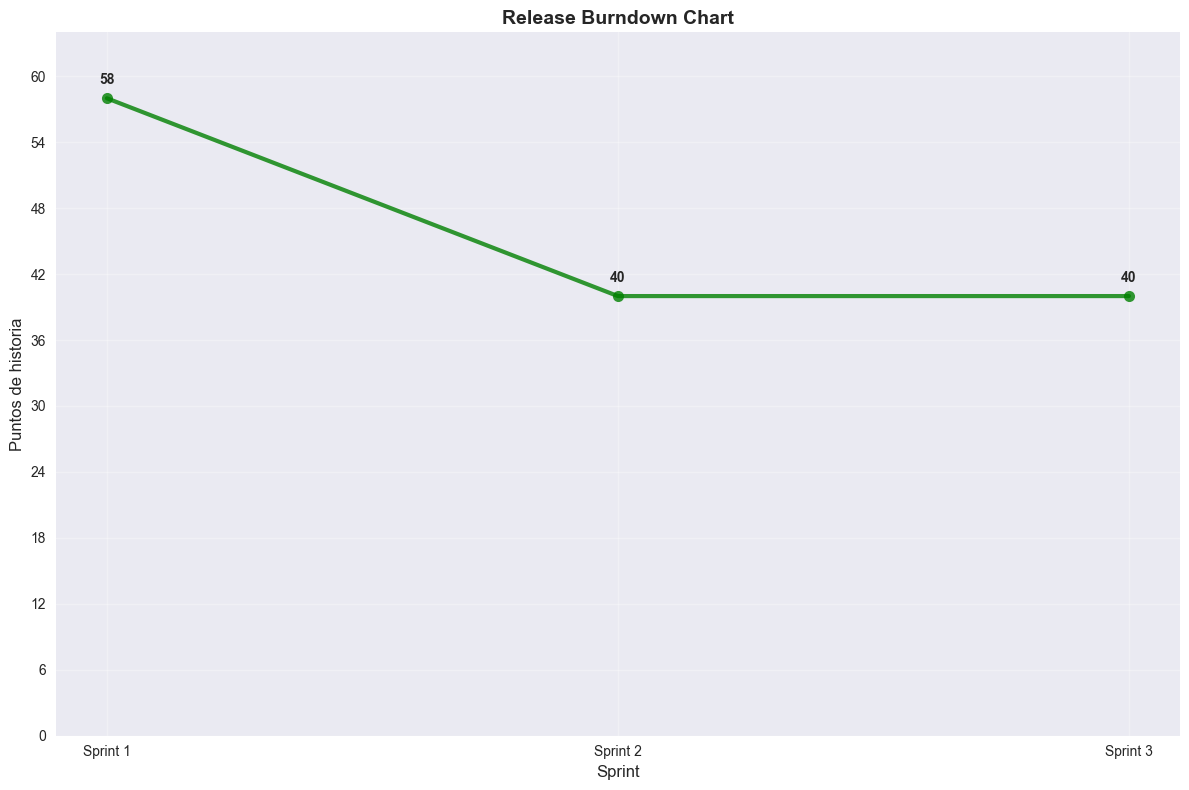


Estadísticas del Release Burndown Chart:
Total de story points en el proyecto: 58
Sprint 1: 58.0 puntos faltantes en TODO el proyecto
Sprint 2: 40.0 puntos faltantes en TODO el proyecto
  Velocidad del sprint anterior: 18.0 puntos
Sprint 3: 40.0 puntos faltantes en TODO el proyecto
  Velocidad del sprint anterior: 0.0 puntos


In [37]:
# Función corregida para calcular puntos faltantes en TODO el proyecto
def calculate_sprint_remaining_points_corrected(sprint, current_week, story_points_data, enhanced_week_data):
    """
    Calcula los puntos de historia faltantes al inicio de un sprint específico.
    Esto representa cuántos puntos quedan por completar en TODO el proyecto al inicio del sprint.
    """
    # Obtener el total de puntos de historia en todo el proyecto
    total_project_points = story_points_data['story_points'].sum()
    
    # Determinar qué semana corresponde a este sprint
    sprint_week_mapping = {
        'Sprint 1': 1,
        'Sprint 2': 3,  # Sprint 2 empieza en semana 3
        'Sprint 3': 5   # Sprint 3 empieza en semana 5
    }
    
    sprint_start_week = sprint_week_mapping.get(sprint, 1)
    
    # Calcular puntos completados hasta el inicio del sprint
    completed_points = 0
    
    # Sumar puntos de sprints anteriores que ya terminaron completamente
    for prev_sprint in ['Sprint 1', 'Sprint 2', 'Sprint 3']:
        if prev_sprint == sprint:
            break  # No incluir el sprint actual
            
        prev_sprint_week = sprint_week_mapping.get(prev_sprint, 1)
        
        # Verificar si el sprint anterior ya terminó completamente
        # Un sprint está completo si todas sus subtareas están en estado "Done"
        prev_sprint_data = enhanced_week_data[enhanced_week_data['sprint'] == prev_sprint]
        
        if not prev_sprint_data.empty:
            # Verificar si todas las subtareas del sprint anterior están completadas
            total_subtasks = len(prev_sprint_data)
            completed_subtasks = len(prev_sprint_data[prev_sprint_data['status'] == 'Done'])
            
            # Si todas las subtareas están completadas, sumar sus puntos
            if total_subtasks > 0 and completed_subtasks == total_subtasks:
                prev_sprint_hus = story_points_data[story_points_data['sprint'] == prev_sprint]
                completed_points += prev_sprint_hus['story_points'].sum()
                print(f"  {prev_sprint}: COMPLETADO ({completed_subtasks}/{total_subtasks} subtareas) - {prev_sprint_hus['story_points'].sum()} puntos")
            else:
                print(f"  {prev_sprint}: NO COMPLETADO ({completed_subtasks}/{total_subtasks} subtareas)")
    
    # Calcular puntos faltantes al inicio del sprint (en todo el proyecto)
    remaining_points = total_project_points - completed_points
    
    return {
        'sprint': sprint,
        'total_project_points': total_project_points,
        'completed_points': completed_points,
        'remaining_points': max(0, remaining_points)  # No puede ser negativo
    }

# Crear el Release Burndown Chart corregido
def create_release_burndown_chart_corrected(current_week, story_points_data, enhanced_week_data):
    """
    Crea un Release Burndown Chart que muestra los puntos de historia faltantes al inicio de cada sprint.
    Se actualiza al finalizar cada sprint.
    """
    print("Creando Release Burndown Chart (versión corregida)...")
    
    # Obtener información de sprints
    sprints = story_points_data['sprint'].unique()
    sprints = sorted(sprints)  # Sprint 1, Sprint 2, Sprint 3
    
    print(f"Sprints encontrados: {list(sprints)}")
    
    # Calcular puntos de historia faltantes al inicio de cada sprint
    sprint_data = []
    
    for sprint in sprints:
        sprint_info = calculate_sprint_remaining_points_corrected(sprint, current_week, story_points_data, enhanced_week_data)
        sprint_data.append(sprint_info)
        print(f"{sprint}: {sprint_info['remaining_points']:.1f} puntos faltantes en TODO el proyecto")
    
    # Crear el gráfico
    plt.figure(figsize=(12, 8))
    
    sprints_labels = [sprint.replace('Sprint ', 'Sprint ') for sprint in sprints]
    remaining_points = [data['remaining_points'] for data in sprint_data]
    
    # Graficar línea con puntos
    plt.plot(sprints_labels, remaining_points, 'o-', linewidth=3, markersize=8, color='green', alpha=0.8)
    
    # Configurar el gráfico
    plt.xlabel('Sprint', fontsize=12)
    plt.ylabel('Puntos de historia', fontsize=12)
    plt.title('Release Burndown Chart', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    
    # Configurar eje Y
    max_points = max(remaining_points) if remaining_points else 50
    max_points = int(np.ceil(max_points * 1.1))
    plt.ylim(0, max_points)
    plt.yticks(range(0, max_points + 1, max(1, max_points // 10)))
    
    # Añadir valores en los puntos
    for i, (sprint, points) in enumerate(zip(sprints_labels, remaining_points)):
        plt.annotate(f'{points:.0f}', 
                    (i, points), 
                    textcoords="offset points", 
                    xytext=(0,10), 
                    ha='center',
                    fontsize=10,
                    fontweight='bold')
    
    plt.tight_layout()
    
    # Guardar el gráfico
    week_folder = f'week_{current_week}'
    if not os.path.exists(week_folder):
        os.makedirs(week_folder)
        print(f"Carpeta creada: {week_folder}")
    
    save_path = os.path.join(week_folder, 'release burndown chart.png')
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"Release Burndown Chart guardado en: {save_path}")
    
    plt.show()
    
    # Mostrar estadísticas
    print(f"\nEstadísticas del Release Burndown Chart:")
    total_story_points = story_points_data['story_points'].sum()
    print(f"Total de story points en el proyecto: {total_story_points}")
    
    for i, data in enumerate(sprint_data):
        sprint_num = i + 1
        print(f"Sprint {sprint_num}: {data['remaining_points']:.1f} puntos faltantes en TODO el proyecto")
        if i > 0:
            velocity = sprint_data[i-1]['remaining_points'] - data['remaining_points']
            print(f"  Velocidad del sprint anterior: {velocity:.1f} puntos")
    
    return {
        'sprints': sprints_labels,
        'remaining_points': remaining_points,
        'sprint_data': sprint_data,
        'save_path': save_path
    }

# Crear el Release Burndown Chart 
release_burndown_data_corrected = create_release_burndown_chart_corrected(week, story_points_data, enhanced_week_data)


In [38]:
import re

# Función para crear archivo markdown con asignación de tareas
def create_task_assignment_markdown(enhanced_data, sprint_number, week_number):
    """
    Crea un archivo markdown con una tabla de asignación de tareas por integrante
    para el sprint actual
    """
    # Filtrar datos del sprint específico
    sprint_data = enhanced_data[enhanced_data['sprint'] == f'Sprint {sprint_number}'].copy()
    
    if sprint_data.empty:
        print(f"No se encontraron datos para el Sprint {sprint_number}")
        return None
    
    print(f"Creando archivo de asignación de tareas para Sprint {sprint_number}...")
    
    # Crear la carpeta week# si no existe
    week_folder = f'week_{week_number}'
    if not os.path.exists(week_folder):
        os.makedirs(week_folder)
        print(f"Carpeta creada: {week_folder}")
    
    # Base URL de Jira
    jira_base_url = "https://proyecto-final-grupo-009.atlassian.net/browse/"
    
    # Crear las filas de la tabla
    table_rows = []
    table_rows.append("| HU | Tarea | Responsable |")
    table_rows.append("| :-- | :-- | :-- |")
    
    # Procesar cada subtarea
    for _, row in sprint_data.iterrows():
        hu_id = row['HU']
        sub_task = row['sub_task']
        assignee = row['assignee'] if pd.notna(row['assignee']) else 'Sin asignar'

        # Extraer solo el identificador tipo SCRUM-XXX
        match = re.search(r'(SCRUM-\d+)', str(sub_task))
        # Si no encuentra, usa el texto completo
        task_key = match.group(1) if match else sub_task

        
        # Crear link al HU (formato: [HU02](URL))
        hu_link = f"[{hu_id}]({jira_base_url}{task_key})"
        
        # Crear fila de tabla
        table_rows.append(f"| {hu_link} | {sub_task} | {assignee} |")
    
    # Crear el contenido completo del archivo markdown
    markdown_content = "# Asignación de tareas por integrante\n\n"
    markdown_content += "\n".join(table_rows)
    
    # Guardar el archivo
    save_path = os.path.join(week_folder, 'Asignación de tareas por integrante.md')
    with open(save_path, 'w', encoding='utf-8') as f:
        f.write(markdown_content)
    
    print(f"Archivo de asignación de tareas guardado en: {save_path}")
    print(f"Total de tareas: {len(sprint_data)}")
    
    # Mostrar vista previa
    print("\nVista previa del archivo:")
    print(markdown_content[:500])
    if len(markdown_content) > 500:
        print("...")
    
    return save_path

# Crear el archivo markdown de asignación de tareas
task_assignment_path = create_task_assignment_markdown(enhanced_week_data, sprint_number, week)

Creando archivo de asignación de tareas para Sprint 2...
Archivo de asignación de tareas guardado en: week_3/Asignación de tareas por integrante.md
Total de tareas: 30

Vista previa del archivo:
# Asignación de tareas por integrante

| HU | Tarea | Responsable |
| :-- | :-- | :-- |
| [HU04](https://proyecto-final-grupo-009.atlassian.net/browse/SCRUM-183) | SCRUM-183 - Crear backend | Johann Sebastian Paez Campos |
| [HU04](https://proyecto-final-grupo-009.atlassian.net/browse/SCRUM-184) | SCRUM-184 - Crear componente de registro de pedidos en APP | js.cervantes |
| [HU04](https://proyecto-final-grupo-009.atlassian.net/browse/SCRUM-185) | SCRUM-185 - Crear vista de registro de pedidos en
...
